For this section, we are looking into the property sales in King Country in the USA. Our aim is to predict what the value of a new property would be given specific features of the property. 
Our dataset has several features so we will need to first identify the key features that we want to use before we proceed with building the model itself

In [1]:
#STEP 1
#We start by importing all the relevant modules
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
#STEP 2: Loading data and throwing away useless columns

#Load the data
df = pd.read_csv('../Data/kc_house_data.csv')

#Drop the columns that we dont need
df = df.drop(['date', 'id'], axis = 1)

#split the dataset into training, testing and valuation
df_train, df_val, df_test = np.split(df.sample(frac = 1, random_state=42), [int(0.6*len(df)), int(0.8*len(df))])
#df_train, df_val, df_test = np.split(df.sample(frac = 1, random_state=42), [12967, 17290]). This is technically what the above line does but we might need to revisit it later on to make sense of it

#Deleting the original dataframe to avoid confusion
del df

df_train

#Note that the indices are not in order. For the train, we begin with 735 then move to 283o then to 4106. This would not work so well for an RNN though

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
735,365000.0,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700
2830,865000.0,5,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283
4106,1038000.0,4,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685
16218,1490000.0,3,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226
19964,711000.0,3,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17931,552000.0,2,1.00,1150,5000,1.0,0,0,4,7,1050,100,1924,0,98115,47.6846,-122.317,1463,4320
12445,592500.0,3,2.00,1170,6750,1.0,0,0,5,7,800,370,1947,0,98115,47.6752,-122.281,1330,6750
13478,793000.0,4,2.50,2450,4080,1.5,0,0,4,8,1490,960,1930,0,98115,47.6899,-122.319,2000,4080
4223,571900.0,4,1.75,1710,8947,1.0,0,0,4,7,1710,0,1956,0,98007,47.5947,-122.135,1360,10133


In [3]:
#STEP 2.1: Visualising the training dataset
df_train.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.296700e+04,12967.000000,12967.000000,12967.000000,1.296700e+04,12967.000000,12967.000000,12967.000000,12967.000000,12967.000000,12967.000000,12967.000000,12967.000000,12967.000000,12967.000000,12967.000000,12967.000000,12967.000000,12967.000000
mean,5.417559e+05,3.379425,2.109316,2084.201434,1.512992e+04,1.486967,0.008560,0.240302,3.408576,7.650652,1789.523945,294.677489,1970.556412,81.424308,98078.129560,47.560341,-122.213939,1989.927585,12871.049510
std,3.769373e+05,0.954512,0.773404,925.271086,4.160611e+04,0.537488,0.092128,0.778847,0.652914,1.177042,831.668338,445.182417,29.372958,394.849237,53.720262,0.138061,0.140744,683.841389,27516.863683
min,7.500000e+04,0.000000,0.000000,290.000000,5.720000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.515000,460.000000,659.000000
25%,3.244050e+05,3.000000,1.500000,1430.000000,5.100000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471900,-122.329000,1490.000000,5137.000000
50%,4.500000e+05,3.000000,2.250000,1920.000000,7.675000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1974.000000,0.000000,98065.000000,47.571300,-122.229000,1840.000000,7642.000000
75%,6.498750e+05,4.000000,2.500000,2550.000000,1.071800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2220.000000,570.000000,1996.000000,0.000000,98118.000000,47.678200,-122.125500,2360.000000,10086.500000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4130.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6110.000000,858132.000000


array([[<AxesSubplot: title={'center': 'price'}>,
        <AxesSubplot: title={'center': 'bedrooms'}>,
        <AxesSubplot: title={'center': 'bathrooms'}>,
        <AxesSubplot: title={'center': 'sqft_living'}>],
       [<AxesSubplot: title={'center': 'sqft_lot'}>,
        <AxesSubplot: title={'center': 'floors'}>,
        <AxesSubplot: title={'center': 'waterfront'}>,
        <AxesSubplot: title={'center': 'view'}>],
       [<AxesSubplot: title={'center': 'condition'}>,
        <AxesSubplot: title={'center': 'grade'}>,
        <AxesSubplot: title={'center': 'sqft_above'}>,
        <AxesSubplot: title={'center': 'sqft_basement'}>],
       [<AxesSubplot: title={'center': 'yr_built'}>,
        <AxesSubplot: title={'center': 'yr_renovated'}>,
        <AxesSubplot: title={'center': 'zipcode'}>,
        <AxesSubplot: title={'center': 'lat'}>],
       [<AxesSubplot: title={'center': 'long'}>,
        <AxesSubplot: title={'center': 'sqft_living15'}>,
        <AxesSubplot: title={'center': 's

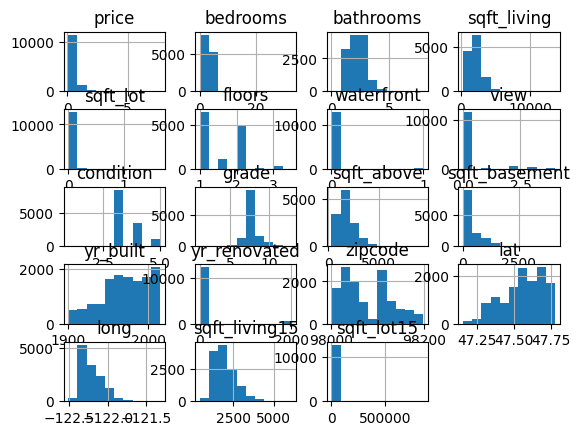

In [4]:
#STEP 2.2: Visualising the training dataset
df_train.hist()

#Generates a bunch of different histograms. Each one has a unique distribution pattern

(<Figure size 1200x1000 with 9 Axes>,
 array([[<AxesSubplot: xlabel='X1', ylabel='Count'>, <AxesSubplot: >,
         <AxesSubplot: >],
        [<AxesSubplot: xlabel='X2', ylabel='X1'>,
         <AxesSubplot: xlabel='X2', ylabel='Count'>, <AxesSubplot: >],
        [<AxesSubplot: xlabel='X3', ylabel='X1'>,
         <AxesSubplot: xlabel='X3', ylabel='X2'>,
         <AxesSubplot: xlabel='X3', ylabel='Count'>]], dtype=object))

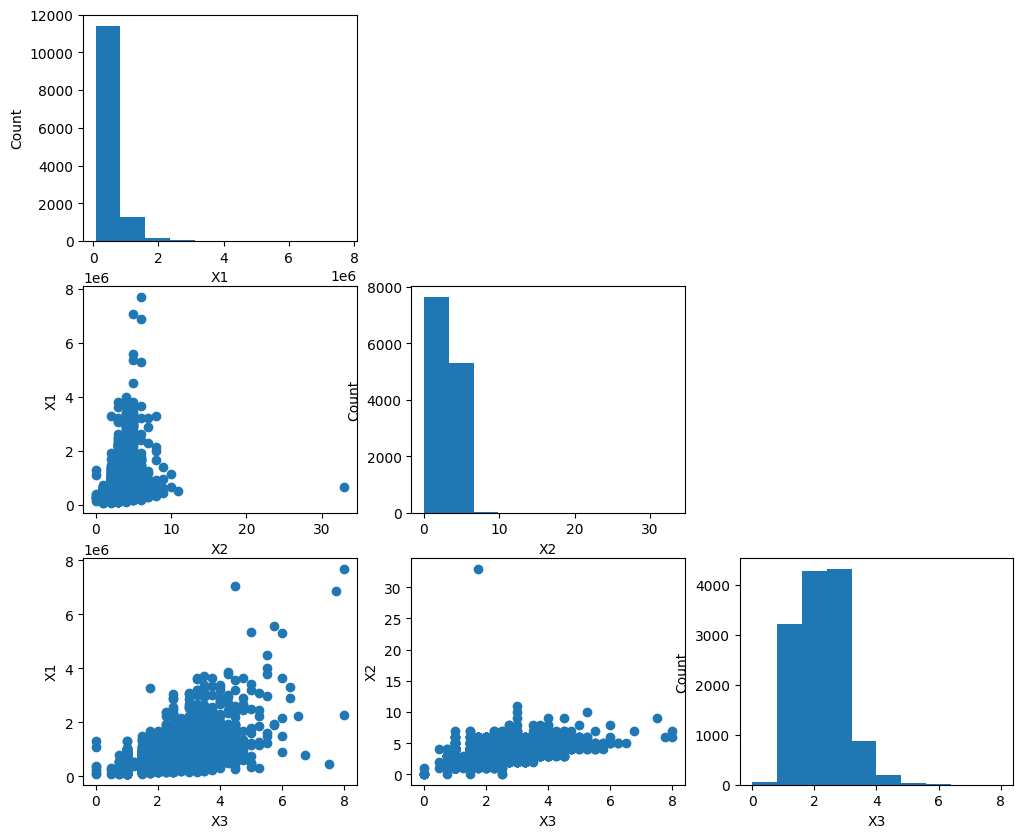

In [8]:
#STEP 2.3: Visualising the dataframe
from mlxtend.plotting import scatterplotmatrix
cols = ['price', 'bedrooms', 'bathrooms']
scatterplotmatrix(df_train[cols].values, figsize = (12,10))

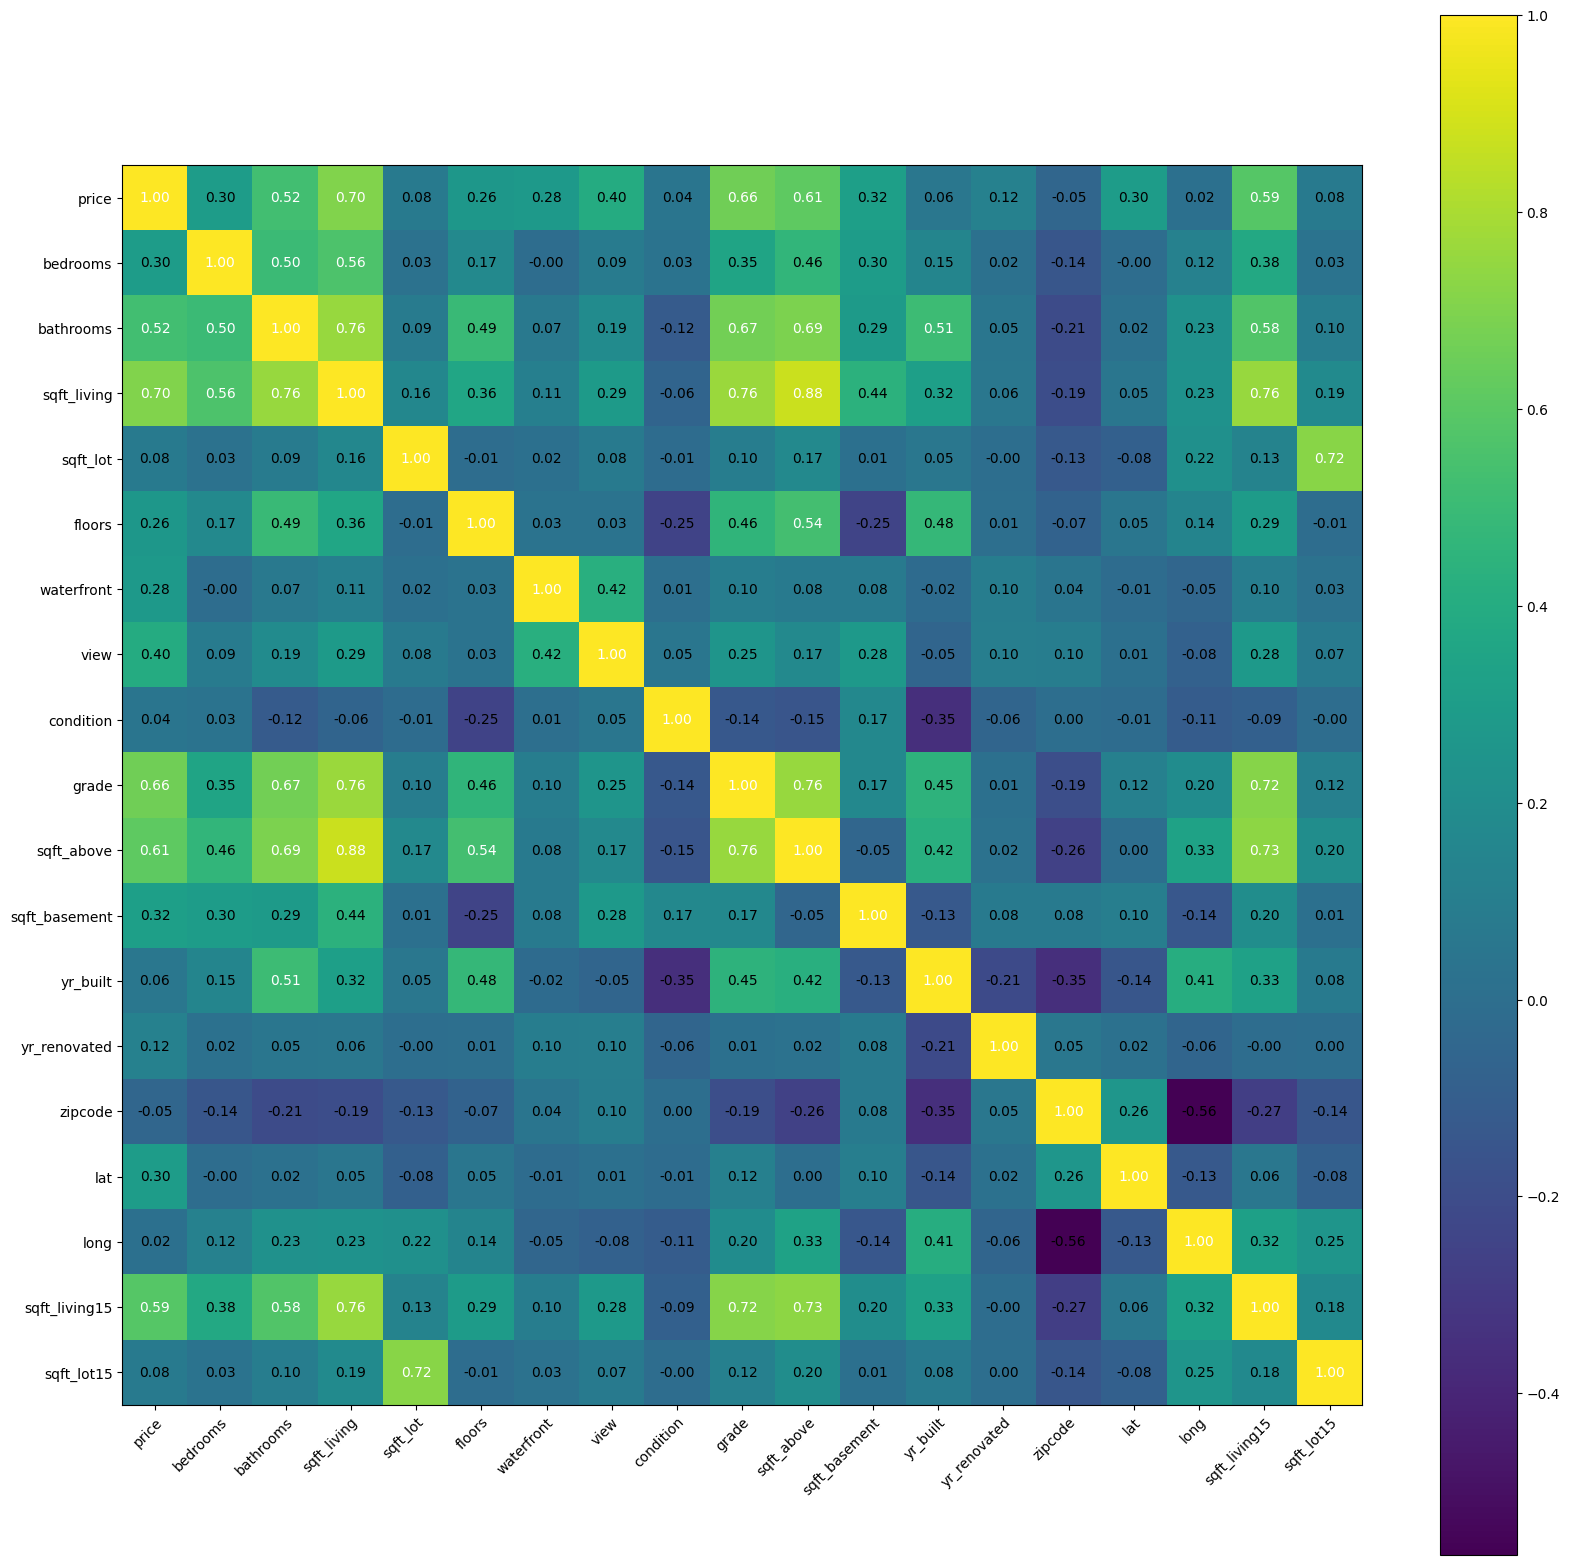

In [15]:
#STEP 2.4: Visualising the dataframe - heatmap
from mlxtend.plotting import heatmap
cols = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors','waterfront',	'view', 'condition', 'grade', 'sqft_above', 'sqft_basement','yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']
cm = np.corrcoef(df_train[cols].values.T)
hm = heatmap(cm, figsize = (20,20), row_names=cols, column_names = cols)
plt.show()

#From heatmap, highest correlation with price is the sqft living which has the index of 0.7